In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
datapath = "D:\\Dati_DSO\\nanoC\\Sipm6x6_LED_55V.txt"

In [3]:
df = pd.read_csv(datapath, sep=" ", skiprows=14)
df

,frame,Time_Stamp,Time,C1,C2
0,1.0,1.708507e+09,-7.000000e-07,0.04,-0.0026
1,1.0,1.708507e+09,-6.990000e-07,0.04,-0.0026
2,1.0,1.708507e+09,-6.980000e-07,0.12,-0.0030
3,1.0,1.708507e+09,-6.970000e-07,0.12,-0.0030
4,1.0,1.708507e+09,-6.960000e-07,0.12,-0.0030
...,...,...,...,...,...
3701595,2644.0,1.708508e+09,6.950000e-07,0.12,0.0022
3701596,2644.0,1.708508e+09,6.960000e-07,0.12,0.0018
3701597,2644.0,1.708508e+09,6.970000e-07,0.12,0.0022
3701598,2644.0,1.708508e+09,6.980000e-07,0.04,0.0018


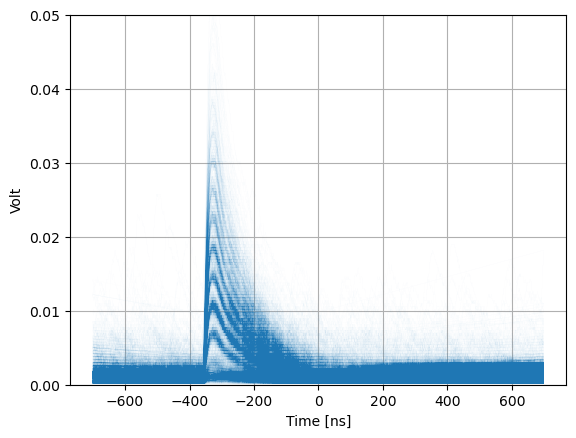

In [38]:
#dd = df.query('frame==100')
plt.plot(df.Time*1E9, abs(df.C2), lw=0.004)
plt.xlabel('Time [ns]')
plt.ylabel('Volt')
plt.ylim(0, 0.05)
plt.grid()

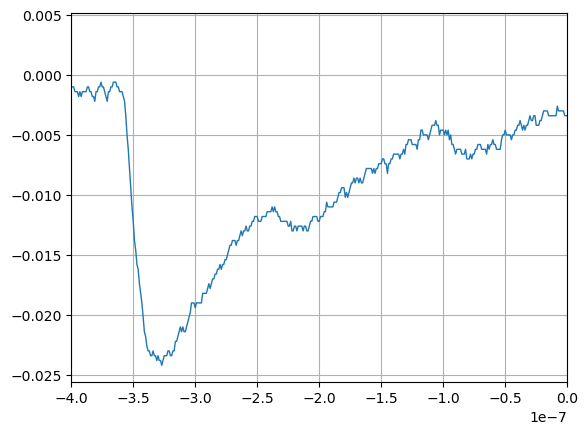

In [5]:
dd = df.query('frame==200')
plt.plot(dd.Time, dd.C2, lw=1)
plt.xlim(-4E-7, 0)
plt.grid()

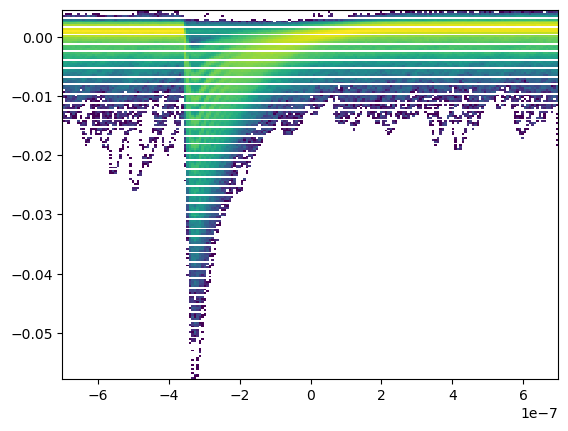

In [6]:
#dd = df.query('frame==100')
import matplotlib as mlp
plt.hist2d(df.Time, df.C2,  bins=200, norm=mlp.colors.LogNorm())
plt.show()

In [7]:
CH2 = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}')
    CH2+=[np.max(np.abs(d.C2))]
CH2 = np.array(CH2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


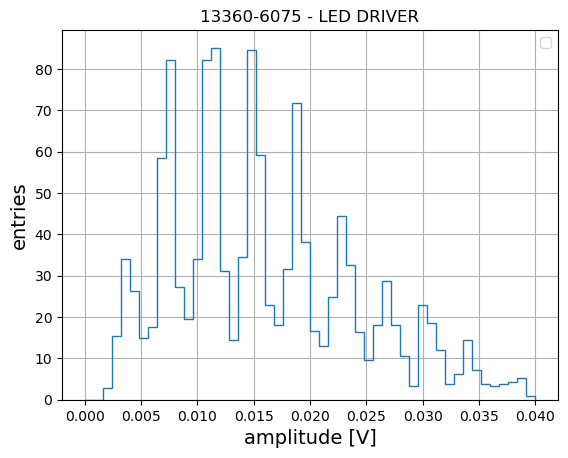

In [12]:
plt.hist(CH2, bins=50, range=[0, 0.04], density=True, histtype='step')

plt.legend()
#plt.yscale('log')
plt.xlabel('amplitude [V]', size=14)
plt.ylabel('entries', size=14)
plt.title('13360-6075 - LED DRIVER')
plt.grid()
plt.show()

Text(0.5, 1.0, '13360-6075 - LED DRIVER')

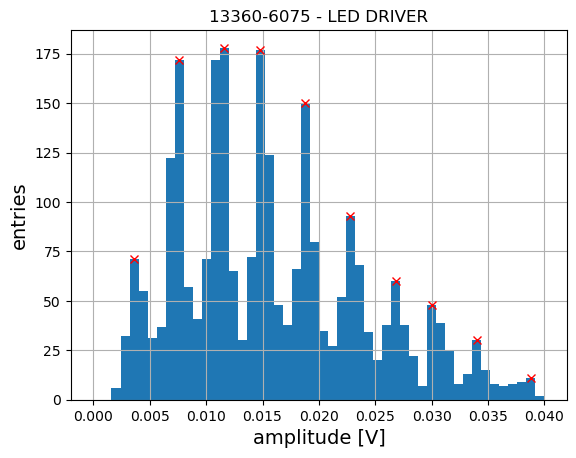

In [33]:
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

def func(x, a, b):
    return a + b*x

histogram_data, bin_edge, patch = plt.hist(CH2, range=[0, 0.04], bins=50)
bin_centres = bin_edge[:-1]+(bin_edge[1:]-bin_edge[:-1])/2
peaks, _ = find_peaks(histogram_data, distance=2)#, height=thr)
plt.plot(bin_centres[peaks], histogram_data[peaks], "x", color='red', label='detected peaks')
plt.grid()
plt.xlabel('amplitude [V]', size=14)
plt.ylabel('entries', size=14)
plt.title('13360-6075 - LED DRIVER')

In [34]:
bin_edge[1]-bin_edge[0]

0.0008

C:\Users\Belle2\AppData\Local\Temp\ipykernel_8908\952718519.py:14: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


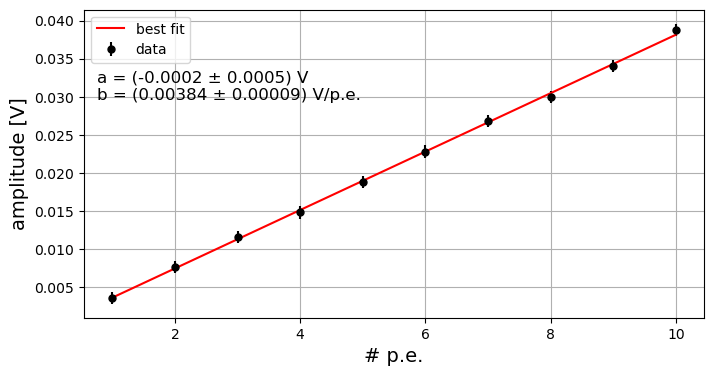

In [39]:
plt.figure(figsize=(8,4))
ADC_peaks = bin_centres[peaks]
ADC_peaks_err = ADC_peaks/ADC_peaks*(bin_edge[1]-bin_edge[0])
pe = np.arange(len(ADC_peaks))+1
plt.errorbar(pe, ADC_peaks, yerr=ADC_peaks_err, color='black', ls='None', marker='o', markersize=5, label='data')
popt, pcov = curve_fit(func, pe, ADC_peaks, p0=[2, 1], sigma=ADC_peaks_err, absolute_sigma=True)
a, b = popt[0], popt[1]
var_a, cov_ab, var_b = pcov[0,0], pcov[0,1], pcov[1,1]
y_fit = func(pe, a, b)
plt.plot(pe, y_fit, color='red', label='best fit')
plt.grid()
A = 'a = ({:.4f} ± {:.4f}) V'.format(popt[0],np.sqrt(pcov[0,0]))
B = 'b = ({:.5f} ± {:.5f}) V/p.e.'.format(popt[1],np.sqrt(pcov[1,1]))
plt.annotate(A+'\n'+B,
        xy=(0.02, 0.8), xycoords='axes fraction',
        ha='left', va='top', textcoords='offset points', fontsize=12)
plt.xlabel('# p.e.', size=14)
plt.ylabel('amplitude [V]', size=14)
plt.legend()
#plt.savefig(f'plots/calibrations/calibration_{SiPM}.png', bbox_inches='tight', dpi = 150)
plt.show()

## dark

In [4]:
ls D/Dati_DSO/nanoC

Formato del parametro non corretto - "Dati_DSO".


In [5]:
datapath = "D:\\Dati_DSO\\nanoC\\Sipm6x6_dark_55V.txt"

In [6]:
df = pd.read_csv(datapath, sep=" ", skiprows=14)
df

,frame,Time_Stamp,Time,C1,C2
0,2645.0,1.708508e+09,-7.000000e-07,0.04,0.0030
1,2645.0,1.708508e+09,-6.990000e-07,0.04,0.0026
2,2645.0,1.708508e+09,-6.980000e-07,0.12,0.0030
3,2645.0,1.708508e+09,-6.970000e-07,0.12,0.0026
4,2645.0,1.708508e+09,-6.960000e-07,0.12,0.0030
...,...,...,...,...,...
3554595,2534.0,1.708510e+09,6.950000e-07,0.04,-0.0002
3554596,2534.0,1.708510e+09,6.960000e-07,0.04,0.0002
3554597,2534.0,1.708510e+09,6.970000e-07,0.12,0.0002
3554598,2534.0,1.708510e+09,6.980000e-07,0.04,0.0006


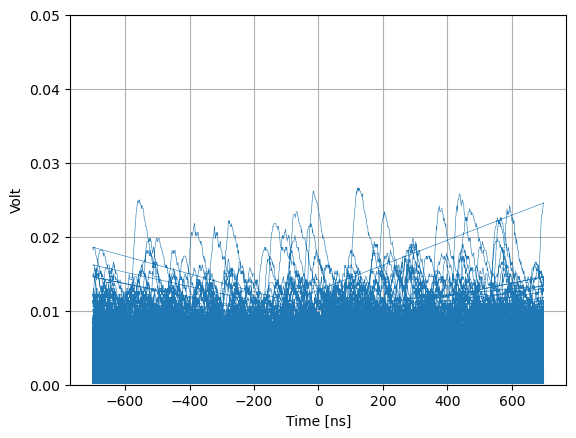

In [7]:
#dd = df.query('frame==100')
plt.plot(df.Time*1E9, abs(df.C2), lw=0.4)
plt.xlabel('Time [ns]')
plt.ylabel('Volt')
plt.ylim(0, 0.05)
plt.grid()

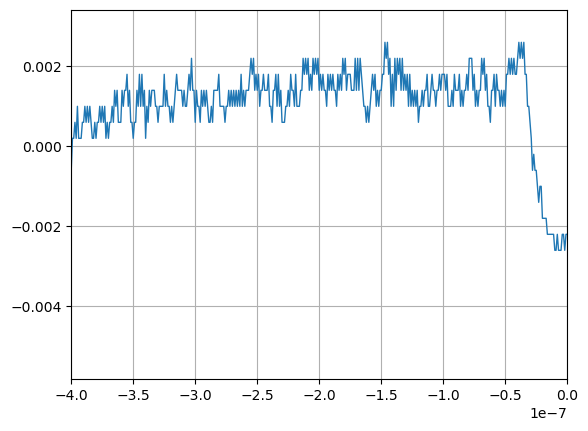

In [9]:
dd = df.query('frame==200')
plt.plot(dd.Time, dd.C2, lw=1)
plt.xlim(-4E-7, 0)
plt.grid()

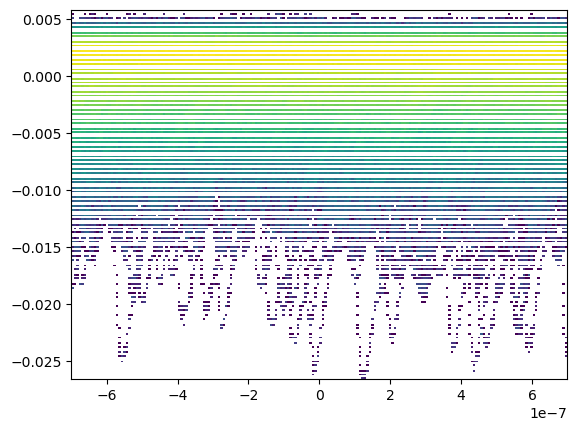

In [10]:
#dd = df.query('frame==100')
import matplotlib as mlp
plt.hist2d(df.Time, df.C2,  bins=200, norm=mlp.colors.LogNorm())
plt.show()

In [11]:
CH2 = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}')
    CH2+=[np.max(np.abs(d.C2))]
CH2 = np.array(CH2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


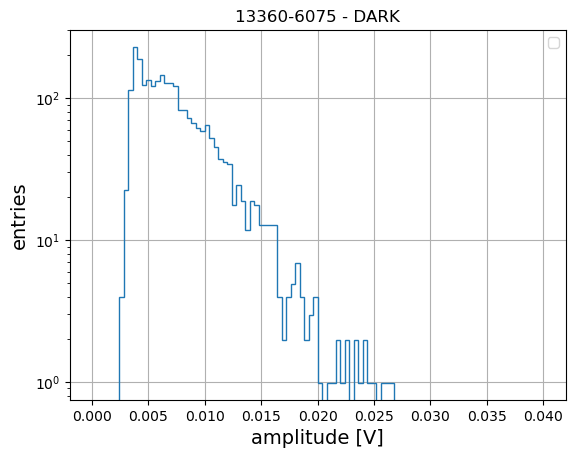

In [12]:
plt.hist(CH2, bins=100, range=[0, 0.04], density=True, histtype='step')

plt.legend()
#plt.yscale('log')
plt.xlabel('amplitude [V]', size=14)
plt.ylabel('entries', size=14)
plt.title('13360-6075 - DARK')
plt.grid()
plt.yscale('log')
plt.show()